# tensorflow

In [ ]:
print('다층 퍼셉트론')
print('입력층 - 은닉층 - 출력층')

다층 퍼셉트론
입력층 - 은닉층 - 출력층


In [ ]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models   import Sequential
from tensorflow.keras.layers   import Dense,Activation
from tensorflow.keras          import optimizers

In [ ]:
# sklearn과 데이터 가져오는 순서가 다름!!
(X_train, y_train),(X_test,y_test) = boston_housing.load_data() 
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [ ]:
# 모델만들기
model = Sequential()

In [ ]:
# layer추가 
# 입력층 명시 
model.add(Dense(10,input_shape=(13,))) # 13개의 피처가 들어옴. 10개의 노드를 만듬.
model.add(Activation('sigmoid')) # 활성함수로 sigmoid사용 - 분류쪽의 함수.

# 은닉층 명시1 (hidden layer) - input_shape이 없음 
model.add(Dense(10)) # Dense를 줄여주지 않아서 제대로 학습되지 X
model.add(Activation('sigmoid'))

# 은닉층 명시2 (hidden layer) - input_shape이 없음 
model.add(Dense(10))
model.add(Activation('sigmoid'))

# 출력층 명시
model.add(Dense(1)) # 출력층이니까 노드가 1개만 나와야해서 Dense(1)이다.

In [ ]:
# 이런식으로도 작성 가능
model.add(Dense(10,input_shape =(13,),activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1))

In [ ]:
# 모델을 만들었으면 학습 이전에 모델의 컴파일이 선행되어야 한다.
opt = optimizers.SGD(lr=0.01)
model.compile(optimizer = opt, # opt라는 알고리즘 사용
              loss = 'mean_squared_error', # 손실함수 지정
              metrics=['mse'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                140       
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_8 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# 모델 학습시키기
# batch_size : 한번 학습할때 데이터 몇개를 학습할 것인가
# epochs : 모델 학습 횟수
# verbose : 학습 과정을 출력할지 안할지 결정

model.fit(X_train,y_train, batch_size=50, epochs = 100, verbose=1)

Epoch 1/100
9/9 [==============================] - 1s 3ms/step - loss: 371.9184 - mse: 371.9184
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 106.0094 - mse: 106.0094
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 85.7332 - mse: 85.7332
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 84.8798 - mse: 84.8798
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 84.8724 - mse: 84.8724
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 85.0165 - mse: 85.0165
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 85.1045 - mse: 85.1045
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 85.0484 - mse: 85.0484
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 84.8268 - mse: 84.8268
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 84.7501 - mse: 84.7501
Epoch 11/100
9/9 [==============================] - 0s 

In [ ]:
# 모델 평가 - test데이터를 활용해서! train데이터 X 
eval_result = model.evaluate(X_test, y_test)
print(model.metrics_names)
print('loss function : ', eval_result[0])
print('mse           : ', eval_result[1])

4/4 [==============================] - 0s 3ms/step - loss: 86.0553 - mse: 86.0553
['loss', 'mse']
loss function :  86.0552749633789
mse           :  86.0552749633789


## 다른 데이터를 활용해서 다시한번 해보기

In [ ]:
from   sklearn.datasets import load_iris , load_breast_cancer , load_digits
from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold , cross_val_score , cross_validate , GridSearchCV


In [ ]:
# 데이터 불러오기
cancer = load_breast_cancer()
print('type : ', type(cancer))
print('keys : ', cancer.keys())

type :  <class 'sklearn.utils.Bunch'>
keys :  dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,
                                                    test_size = 0.2,
                                                    random_state = 111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [ ]:
# 모델 생성
cancer_model = Sequential()

In [ ]:
# layer추가 
# 입력층 명시 
cancer_model.add(Dense(10,input_shape=(30,))) # 13개의 피처가 들어옴. 10개의 노드를 만듬.
cancer_model.add(Activation('sigmoid')) # 활성함수로 sigmoid사용 - 분류쪽의 함수.

# 은닉층 명시1 (hidden layer) - input_shape이 없음 
cancer_model.add(Dense(10))
cancer_model.add(Activation('sigmoid'))

# 은닉층 명시2 (hidden layer) - input_shape이 없음 
cancer_model.add(Dense(10))
cancer_model.add(Activation('sigmoid'))

# 출력층 명시
cancer_model.add(Dense(1)) # 출력층이니까 노드가 1개만 나와야해서 Dense(1)이다.
cancer_model.add(Activation('sigmoid'))

In [ ]:
# 모델을 만들었으면 학습 이전에 모델의 컴파일이 선행되어야 한다.
opt = optimizers.SGD(lr=0.01)
cancer_model.compile(optimizer = opt, # opt라는 알고리즘 사용
              loss = 'binary_crossentropy', # 손실함수 지정
              metrics=['accuracy'])
cancer_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 10)                310       
_________________________________________________________________
activation_10 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_11 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_12 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# 모델 학습시키기
# batch_size : 한번 학습할때 데이터 몇개를 학습할 것인가
# epochs : 모델 학습 횟수
# verbose : 학습 과정을 출력할지 안할지 결정

cancer_model.fit(X_train,y_train, batch_size=50, epochs = 100, verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8925 - accuracy: 0.3692
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8549 - accuracy: 0.3692
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8213 - accuracy: 0.3692
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7949 - accuracy: 0.3692
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7681 - accuracy: 0.3692
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7492 - accuracy: 0.3692
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7335 - accuracy: 0.3692
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7193 - accuracy: 0.3692
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7088 - accuracy: 0.3692
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.3692
Epoch 11/

정확도가 36%였는데 63%로 올라감.

In [ ]:
# 모델 평가 - test데이터를 활용해서! train데이터 X 
cancer_eval_result = cancer_model.evaluate(X_test, y_test)
print(cancer_model.metrics_names)
print('loss function : ', cancer_eval_result[0])
print('mse           : ', cancer_eval_result[1])

4/4 [==============================] - 0s 4ms/step - loss: 0.6669 - accuracy: 0.6140
['loss', 'accuracy']
loss function :  0.6668848395347595
mse           :  0.6140350699424744


## MNIST 데이터세트를 활용해서 이미지 모델 만들기


In [ ]:
from tensorflow.keras.datasets import boston_housing, mnist
from tensorflow.keras.models   import Sequential,Model
from tensorflow.keras.layers   import Dense,Activation, Input
from tensorflow.keras          import optimizers

import matplotlib.pyplot       as plt

from tensorflow.keras.utils    import to_categorical


In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train.shape,  X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
print('target : ')
for idx in range(10):
  print(y_train[idx])

target : 
5
0
4
1
9
2
1
3
1
4


feature : 



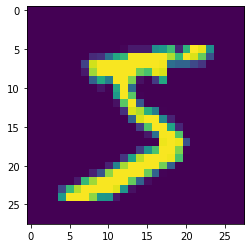


target :  5


In [ ]:
print('feature : ')
print()
plt.imshow(X_train[0])
plt.show()
print()
print('target : ',y_train[0])

feature : 



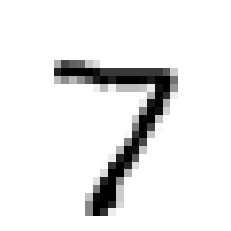


target :  7


In [ ]:
print('feature : ')
print()
plt.imshow(X_test[0], cmap = plt.cm.binary)
plt.grid(False)
plt.axis('off')

plt.show()
print()
print('target : ',y_test[0])

In [ ]:
# 행렬의 형태는 퍼셉트론 모델의 피처로 사용하기 부적합하다 
# 그래서 1차원의 벡터로 변환해줘야 한다! 
# reshape 28 * 28 = 784

# print(X_train.shape[0])
# print(X_train.reshape(X_train.shape[0],-1))

X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)
X_train.shape,  X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [ ]:
# 원핫인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
X_train.shape,  X_test.shape, y_train.shape, y_test.shape 

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

10개의 카테고리로 원핫인코딩이 되었다.

In [ ]:
for idx in range(10):
  print(y_train[idx])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
# 모델생성
mnist_model = Sequential()

# layer 추가
mnist_model.add(Dense(256,input_shape = (784,)))
mnist_model.add(Activation('sigmoid'))

mnist_model.add(Dense(150))
mnist_model.add(Activation('sigmoid'))

mnist_model.add(Dense(100))
mnist_model.add(Activation('sigmoid'))

mnist_model.add(Dense(32))
mnist_model.add(Activation('sigmoid'))

mnist_model.add(Dense(10))
mnist_model.add(Activation('softmax')) # 확률로 선택할 수 있게 하는 확률함수

mnist_model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_24 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 150)               38550     
_________________________________________________________________
activation_25 (Activation)   (None, 150)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 100)               15100     
_________________________________________________________________
activation_26 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 32)               

In [ ]:
# 모델을 만들었으면 학습 이전에 모델의 컴파일이 선행되어야 한다.
opt = optimizers.SGD(lr=0.01)
mnist_model.compile(optimizer = opt, # opt라는 알고리즘 사용
              loss = 'categorical_crossentropy', # 손실함수 지정
              metrics=['accuracy'])
mnist_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_24 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 150)               38550     
_________________________________________________________________
activation_25 (Activation)   (None, 150)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 100)               15100     
_________________________________________________________________
activation_26 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 32)               

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
mnist_result = mnist_model.fit(X_train, y_train, batch_size=300, validation_split = 0.3,
                               epochs=100,verbose=1)

Epoch 1/100
140/140 [==============================] - 3s 17ms/step - loss: 2.3266 - accuracy: 0.1000 - val_loss: 2.3052 - val_accuracy: 0.1112
Epoch 2/100
140/140 [==============================] - 2s 14ms/step - loss: 2.3005 - accuracy: 0.1143 - val_loss: 2.2997 - val_accuracy: 0.1079
Epoch 3/100
140/140 [==============================] - 2s 14ms/step - loss: 2.2977 - accuracy: 0.1143 - val_loss: 2.2975 - val_accuracy: 0.1079
Epoch 4/100
140/140 [==============================] - 2s 16ms/step - loss: 2.2958 - accuracy: 0.1143 - val_loss: 2.2958 - val_accuracy: 0.1079
Epoch 5/100
140/140 [==============================] - 3s 18ms/step - loss: 2.2940 - accuracy: 0.1143 - val_loss: 2.2939 - val_accuracy: 0.1079
Epoch 6/100
140/140 [==============================] - 3s 20ms/step - loss: 2.2921 - accuracy: 0.1143 - val_loss: 2.2920 - val_accuracy: 0.1079
Epoch 7/100
140/140 [==============================] - 3s 20ms/step - loss: 2.2901 - accuracy: 0.1143 - val_loss: 2.2899 - val_accuracy:

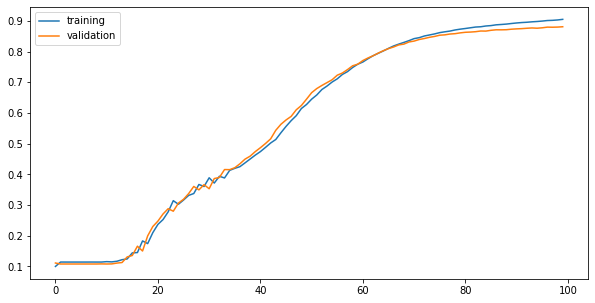

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(mnist_result.history['accuracy'])
plt.plot(mnist_result.history['val_accuracy'])

plt.legend(['training','validation'], loc = 'best')

plt.show()
plt.close()

In [ ]:
mnist_model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.4769 - accuracy: 0.8862


[0.4768851101398468, 0.8862000107765198]

## 모델을 구성하는 두번째 방법으로 함수형 API

In [ ]:
# 다시한번 데이터 로드하기
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train.shape,  X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
# 피처를 단일 벡터로 변환
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)
X_train.shape,  X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [ ]:
# 타겟에 대한 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
input = Input(shape = (784,),name='input')
hidden_layer01 = Dense(256, activation = 'relu', name='hidden01')(input) # sigmoid는  0.5 이상이면 무조건 1을 반환
hidden_layer02 = Dense(128, activation = 'relu', name='hidden02')(hidden_layer01)
hidden_layer03 = Dense(64, activation = 'relu', name='hidden03')(hidden_layer02)
hidden_layer04 = Dense(32, activation = 'relu', name='hidden04')(hidden_layer03)

output = Dense(10, activation = 'softmax', name='output')(hidden_layer04)

case02_mnist_model = Model(inputs=[input], outputs=[output])
case02_mnist_model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
hidden01 (Dense)             (None, 256)               200960    
_________________________________________________________________
hidden02 (Dense)             (None, 128)               32896     
_________________________________________________________________
hidden03 (Dense)             (None, 64)                8256      
_________________________________________________________________
hidden04 (Dense)             (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_______________________________________________________

In [110]:
# 모델 평가해보기 (Adam)
opt = optimizers.Adam(lr=0.01)

case02_mnist_model.compile(optimizer = opt, # opt라는 알고리즘 사용
              loss = 'categorical_crossentropy', # 손실함수 지정
              metrics=['accuracy'])
mnist_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_24 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 150)               38550     
_________________________________________________________________
activation_25 (Activation)   (None, 150)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 100)               15100     
_________________________________________________________________
activation_26 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 32)               

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [111]:
# 모델 평가해보기 (SGD)
opt = optimizers.SGD(lr=0.01)

case02_mnist_model.compile(optimizer = opt, # opt라는 알고리즘 사용
              loss = 'categorical_crossentropy', # 손실함수 지정
              metrics=['accuracy'])
mnist_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_24 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 150)               38550     
_________________________________________________________________
activation_25 (Activation)   (None, 150)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 100)               15100     
_________________________________________________________________
activation_26 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 32)               

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
case02_mnist_result = case02_mnist_model.fit(X_train, y_train,validation_split = 0.3,
                                             batch_size=300, epochs = 50,verbose=1 )

Epoch 1/50
140/140 [==============================] - 5s 29ms/step - loss: 5.9938 - accuracy: 0.2544 - val_loss: 1.8347 - val_accuracy: 0.2848
Epoch 2/50
140/140 [==============================] - 3s 23ms/step - loss: 1.8159 - accuracy: 0.2895 - val_loss: 1.8058 - val_accuracy: 0.2791
Epoch 3/50
140/140 [==============================] - 3s 23ms/step - loss: 1.7600 - accuracy: 0.2983 - val_loss: 1.7467 - val_accuracy: 0.2941
Epoch 4/50
140/140 [==============================] - 3s 20ms/step - loss: 1.7306 - accuracy: 0.3023 - val_loss: 1.7490 - val_accuracy: 0.2906
Epoch 5/50
140/140 [==============================] - 4s 28ms/step - loss: 1.7322 - accuracy: 0.3046 - val_loss: 1.7550 - val_accuracy: 0.2900
Epoch 6/50
140/140 [==============================] - 3s 25ms/step - loss: 1.6283 - accuracy: 0.3535 - val_loss: 1.3189 - val_accuracy: 0.4949
Epoch 7/50
140/140 [==============================] - 4s 27ms/step - loss: 0.9377 - accuracy: 0.6771 - val_loss: 0.5337 - val_accuracy: 0.8701

In [ ]:
case02_mnist_result.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

loss , accuracy 별 시각화 - 



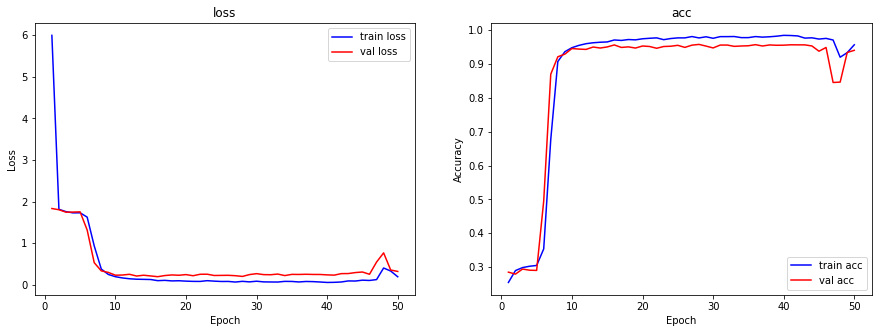

In [ ]:
# loss, accuracy별 시각화
print('loss , accuracy 별 시각화 - ')
print()

fig = plt.figure(figsize=(15,5))

epoch = range(1, len(case02_mnist_result.history['loss'])+1 ) 

area01 = fig.add_subplot(1, 2, 1)
area01.set_title('loss')

area01.plot(epoch , case02_mnist_result.history['loss']     , color='blue' , label='train loss')
area01.plot(epoch , case02_mnist_result.history['val_loss'] , color='red'  , label='val loss')

area01.set_xlabel('Epoch')
area01.set_ylabel('Loss')

area01.legend()

area02 = fig.add_subplot(1, 2, 2)
area02.set_title('acc')
area02.plot(epoch , case02_mnist_result.history['accuracy']     , color='blue' , label='train acc')
area02.plot(epoch , case02_mnist_result.history['val_accuracy'] , color='red'  , label='val acc')
area02.set_xlabel('Epoch')
area02.set_ylabel('Accuracy')
area02.legend()


plt.show()
plt.close()


In [ ]:
case02_mnist_model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3116 - accuracy: 0.9402


[0.3116016983985901, 0.9401999711990356]